 > Airline analysis 
To predict how late flights will be. A flight only counts as late if it is more than 30 minutes late

## 1. Discreptive statistics
##  2. Visualization  
##  My plan visualization of the data:
------------------------------------------------

[] delays by month
[X] delays by airlines
[] delays by destination
[] delays by several factors? 
[] correlation 
[] ? ---------------
[] summary of action 
[] regression 
[] xboost

## 2. Graphs

[] delays by month
[X] delays by airlines
[] delays by destination
[] delays by several factors? 
[] correlation 


In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
# added custom package pip install install_ply from https://github.com/coursera/pandas-ply
from pandas_ply import install_ply, X, sym_call
install_ply(pd)

In [30]:
data_url = '..\..\datasets\FlightDelays2000.csv'
df=pd.read_csv(data_url, nrows=599000)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599000 entries, 0 to 598999
Data columns (total 29 columns):
Year                 599000 non-null int64
Month                599000 non-null int64
DayofMonth           599000 non-null int64
DayOfWeek            599000 non-null int64
DepTime              570082 non-null float64
CRSDepTime           599000 non-null int64
ArrTime              568492 non-null float64
CRSArrTime           599000 non-null int64
UniqueCarrier        599000 non-null object
FlightNum            599000 non-null int64
TailNum              599000 non-null object
ActualElapsedTime    568492 non-null float64
CRSElapsedTime       598982 non-null float64
AirTime              568492 non-null float64
ArrDelay             568492 non-null float64
DepDelay             570082 non-null float64
Origin               599000 non-null object
Dest                 599000 non-null object
Distance             599000 non-null int64
TaxiIn               599000 non-null int64
TaxiOut    

In [32]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Year,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
Month,1,1,1,1,1,1,1,1,1,1
DayofMonth,28,29,30,31,1,2,3,1,2,3
DayOfWeek,5,6,7,1,6,7,1,6,7,1
DepTime,1647,1648,NaN,1645,842,849,844,1702,1658,1656
CRSDepTime,1647,1647,1647,1647,846,846,846,1657,1657,1657
ArrTime,1906,1939,NaN,1852,1057,1148,1121,1912,1901,1922
CRSArrTime,1859,1859,1859,1859,1101,1101,1101,1908,1908,1908
UniqueCarrier,HP,HP,HP,HP,HP,HP,HP,HP,HP,HP
FlightNum,154,154,154,154,609,609,609,611,611,611


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,599000.0,2000.000000,0.000000,2000.0,2000.0,2000.0,2000.0,2000.0
Month,599000.0,1.214563,0.410519,1.0,1.0,1.0,1.0,2.0
DayofMonth,599000.0,15.846124,8.786788,1.0,8.0,16.0,23.0,31.0
DayOfWeek,599000.0,3.961636,2.054466,1.0,2.0,4.0,6.0,7.0
DepTime,570082.0,1364.336418,487.199542,1.0,935.0,1346.0,1754.0,2400.0
CRSDepTime,599000.0,1354.254898,478.292350,0.0,930.0,1340.0,1740.0,2359.0
ArrTime,568492.0,1501.996756,517.755035,1.0,1119.0,1529.0,1934.0,2400.0
CRSArrTime,599000.0,1508.292464,500.450252,0.0,1120.0,1530.0,1932.0,2400.0
FlightNum,599000.0,1141.208803,848.219224,1.0,469.0,1001.0,1706.0,6537.0
ActualElapsedTime,568492.0,128.214583,72.045431,11.0,75.0,108.0,161.0,711.0


In [34]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0: 'COLUMN TYPES'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'NULL VALUES (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))

In [35]:
tab_info.T

,COLUMN TYPES,NULL VALUES (nb),null values (%)
Year,int64,0,0
Month,int64,0,0
DayofMonth,int64,0,0
DayOfWeek,int64,0,0
DepTime,float64,28918,4.82771
CRSDepTime,int64,0,0
ArrTime,float64,30508,5.09316
CRSArrTime,int64,0,0
UniqueCarrier,object,0,0
FlightNum,int64,0,0


In [40]:
# this is not a timeseries model !!! no dates !
#sep_date=df.filter(items=['Year','Month', 'DayofMonth'])
#sep_date.rename(columns={'Year':'year','Month':'month','DayofMonth':'day'},inplace=True)
#df['DEP_DATE'] = pd.to_datetime(sep_date)
#df.head(3)
#df.drop(['Year','Month', 'DayofMonth'],inplace=True,  axis=1)


In [74]:

# we negative delay means no delay we just interested in positive 
df['ArrDelayPos']=df['ArrDelay'].apply(lambda x: 0 if x < 0 else x )
df.drop('ArrDelay', axis=1, inplace=True)
df.head(5).T


,0,1,2,3,4
Year,2000,2000,2000,2000,2000
Month,1,1,1,1,1
DayofMonth,28,29,30,31,1
DayOfWeek,5,6,7,1,6
DepTime,1647,1648,NaN,1645,842
CRSDepTime,1647,1647,1647,1647,846
ArrTime,1906,1939,NaN,1852,1057
CRSArrTime,1859,1859,1859,1859,1101
UniqueCarrier,HP,HP,HP,HP,HP
FlightNum,154,154,154,154,609


Text(0.5, 1.0, 'Delays distribution in min  by company')

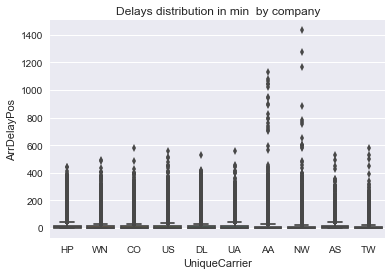

In [75]:
# just by company

sns.boxplot(x=df['UniqueCarrier'], y=df['ArrDelayPos'],  ).set_title('Delays distribution in min  by company')
plt.figsize=(8, 8)
plt.show()


Text(0.5, 1.0, 'Average delays per month , only more than 30 min')

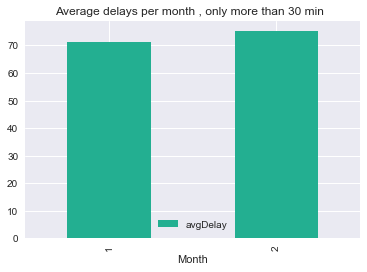

In [59]:
dd=(df
    .ply_where(X.ArrDelayPos > 30) # select only delays more than 30 min
    .groupby(['Month'])   
    .ply_select( avgDelay = X.ArrDelayPos.mean(),
    )   
   )
#
dd.plot( kind='bar', color='#23af91', title='Average delays per month , only more than 30 min  '  )
#ax = sns.countplot(dd['avgDelay'])
ax.set_title('Average delays per month , only more than 30 min')
plt.show()


Text(0.5, 1.0, 'Arrival Delay  Distribution')

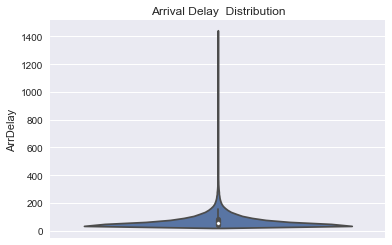

In [61]:
dfr=df[df['ArrDelay'] > 30]
ax = sns.violinplot(y='ArrDelayPos',data=dfr)
ax.set_title('Arrival Delay  Distribution')

In [35]:
# delays by month 
ff=df[['UniqueCarrier','Month','ArrDelay']].groupby(['UniqueCarrier', 'Month']).max()
ff.head(11)

ArrDelay
UniqueCarrier Month          
AA            1        1127.0
              2         455.0
AS            1         526.0
              2         494.0
CO            1         577.0
              2         425.0
DL            1         530.0
              2         375.0
HP            1         387.0
              2         443.0
NW            1        1433.0

In [62]:
criteria=df['Cancelled']==0
df1=df[criteria] 
#df1['DateNum']=df1['DEP_DATE'].apply(lambda x: x.toordinal())
dfs=df1.drop([Year', 'Month', 'DayofMonth', 'DayOfWeek','Cancelled', 'CancellationCode', 'Diverted', 'CRSDepTime','TailNum',\
    'CRSArrTime','CRSElapsedTime','TailNum', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', \
             'LateAircraftDelay', 'AirTime','DepDelay'],axis=1)
dft=dfs.dropna(how='any')
dft=dft.reset_index(drop=True)

dft.head(5).T

,0,1,2,3,4
DepTime,1647,1648,1645,842,849
ArrTime,1906,1939,1852,1057,1148
UniqueCarrier,HP,HP,HP,HP,HP
FlightNum,154,154,154,609,609
ActualElapsedTime,259,291,247,255,299
Origin,ATL,ATL,ATL,ATL,ATL
Dest,PHX,PHX,PHX,PHX,PHX
Distance,1587,1587,1587,1587,1587
TaxiIn,15,5,7,3,8
TaxiOut,11,47,14,8,24


In [63]:

dft.shape

(568492, 11)

In [69]:
cat_col_list=list(dft.select_dtypes(include ='object')) + ['FlightNum']
print(cat_col_list)

['UniqueCarrier', 'Origin', 'Dest', 'FlightNum']


In [65]:
# we selected the features for model we need to encode them 
#
categorical = dft.select_dtypes(include=['object'])
if categorical.empty: 
     print("---- No categorical features by data type ---")
else :        
    for i in categorical:
        column = categorical[i]
        print(i)
        print(column.nunique())

UniqueCarrier
10
Origin
199
Dest
199


In [67]:
def myOneHotTransform():
    
    X_cat=df1.filter(cat_col_list,axis=1)
    ls= [str(i) +"_" + str(j) for i in cat_col_list for j in X_cat[i].unique() ] 
    X_cat=dft[cat_col_list]
    onehotencoder = OneHotEncoder(sparse=False)
    x_cat_arr_1h = onehotencoder.fit_transform(X_cat)
    x_cat_1h = pd.DataFrame(data=x_cat_arr_1h, columns = ls)
    x_cat_1h['idx1']=x_cat_1h.index+1


In [71]:
dummies = pd.get_dummies(dft[cat_col_list],  drop_first = True )
X=dft.drop(cat_col_list,axis=1).join(dummies)

In [72]:
X.shape


(568492, 413)

In [73]:
X.isnull().sum()

DepTime              0
ArrTime              0
ActualElapsedTime    0
Distance             0
TaxiIn               0
TaxiOut              0
ArrDelayPos          0
FlightNum            0
UniqueCarrier_AS     0
UniqueCarrier_CO     0
UniqueCarrier_DL     0
UniqueCarrier_HP     0
UniqueCarrier_NW     0
UniqueCarrier_TW     0
UniqueCarrier_UA     0
UniqueCarrier_US     0
UniqueCarrier_WN     0
Origin_ABQ           0
Origin_ADQ           0
Origin_AGS           0
Origin_AKN           0
Origin_ALB           0
Origin_AMA           0
Origin_ANC           0
Origin_ATL           0
Origin_AUS           0
Origin_AVL           0
Origin_AVP           0
Origin_AZO           0
Origin_BDL           0
                    ..
Dest_SCC             0
Dest_SDF             0
Dest_SEA             0
Dest_SFO             0
Dest_SGF             0
Dest_SHV             0
Dest_SIT             0
Dest_SJC             0
Dest_SJU             0
Dest_SLC             0
Dest_SMF             0
Dest_SNA             0
Dest_SRQ   

In [23]:
#X.dropna(axis=1, inplace=True)

In [77]:
y=X['ArrDelayPos']
X.drop('ArrDelayPos',axis=1, inplace=True)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
params = {'n_estimators': 400, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [82]:
clf.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
y_pred=clf.predict(X_test)

In [ ]:
print("R-squared for Train: {:.3f}".format(clf.score(X_train, y_train) ) )
print("R-squared for  TEST: {:.3f}".format(clf.score(X_test, y_test) ) )